I'm Brent, and for this project, I’ll be exploring the classic diamonds dataset available through Seaborn. This dataset contains information on the prices of almost 54,000 diamonds, including features like carat, cut, color, clarity, and price. I will walk through some initial data transformations, create visualizations to explore trends, and present a short narrative based on my findings.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diamonds.csv')

In [5]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          flo

In [6]:
print(df.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


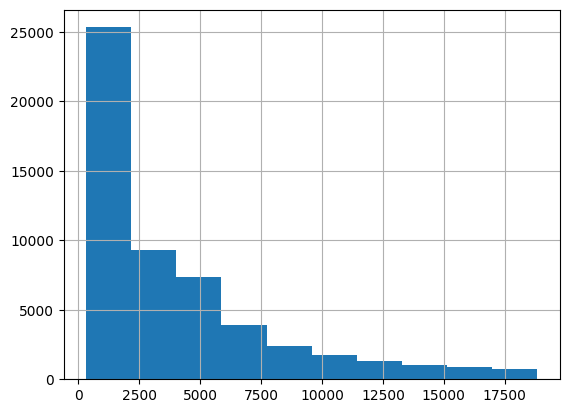

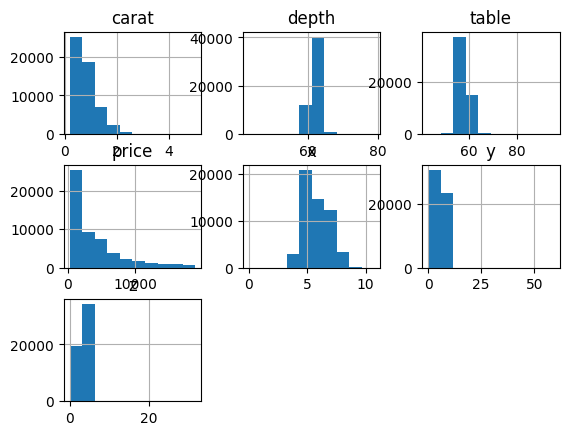

In [8]:
df['price'].hist()

df.hist()

plt.show()

The trend seems to be that the more expensive the diamond, fewer there are, and the less expensive the diamond, the higher the frequency/quantity

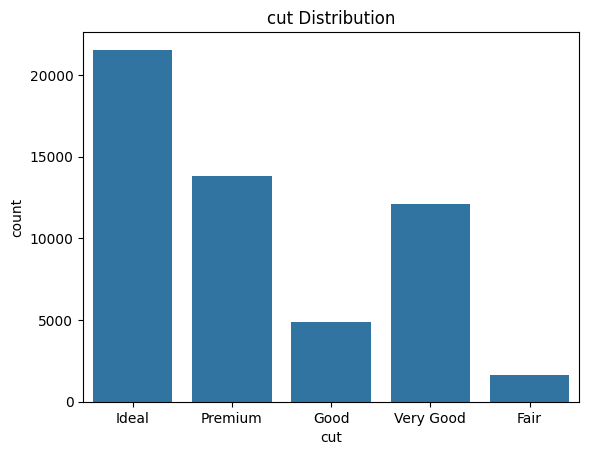

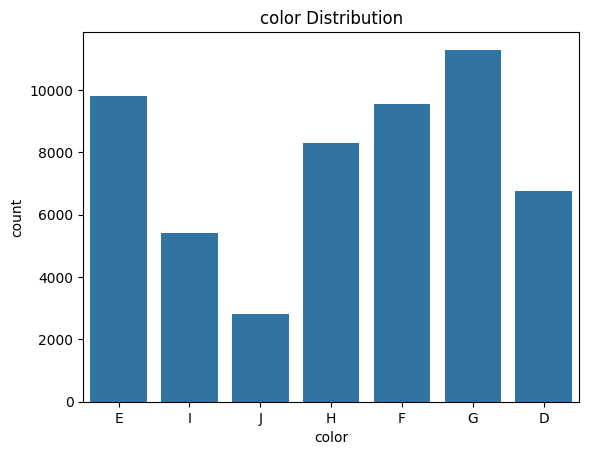

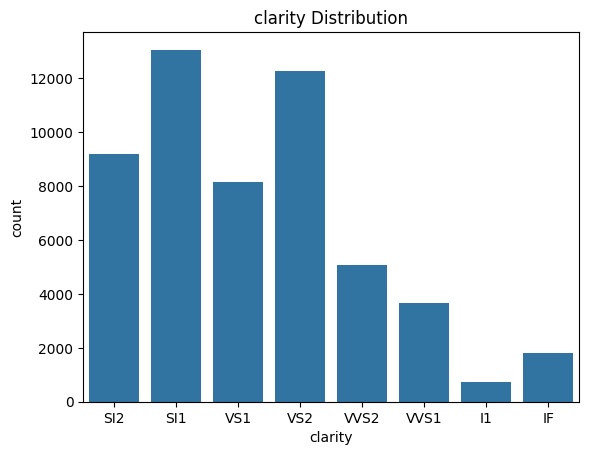

In [10]:
df['carat'].value_counts()

for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

# Show all plots
plt.show()

The labelling for the clarity and color leave much to be desired. It is not clear exactly what these levels represent to a layman, and more information would need to be provided in order to make any conclusions about those categories. However, we can see that from the cut distribution, ideal is the highest in frequency, which is to be expected. 

Initial Data Transformation and Feature Engineering:
We'll rename the x column (which represents length in mm) to length_mm for clarity.

In [11]:
# Rename 'x' to 'length_mm'
df.rename(columns={'x': 'length_mm'}, inplace=True)

We'll create a new column called volume_mm3 that estimates the diamond's volume using x, y, and z dimensions.

In [12]:
# Calculate diamond volume
df['volume_mm3'] = df['length_mm'] * df['y'] * df['z']

In [14]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,length_mm,y,z,volume_mm3
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,38.718000


Goal: Does a heavier diamond (higher carat) mean a higher price?

Chart Type: Scatterplot

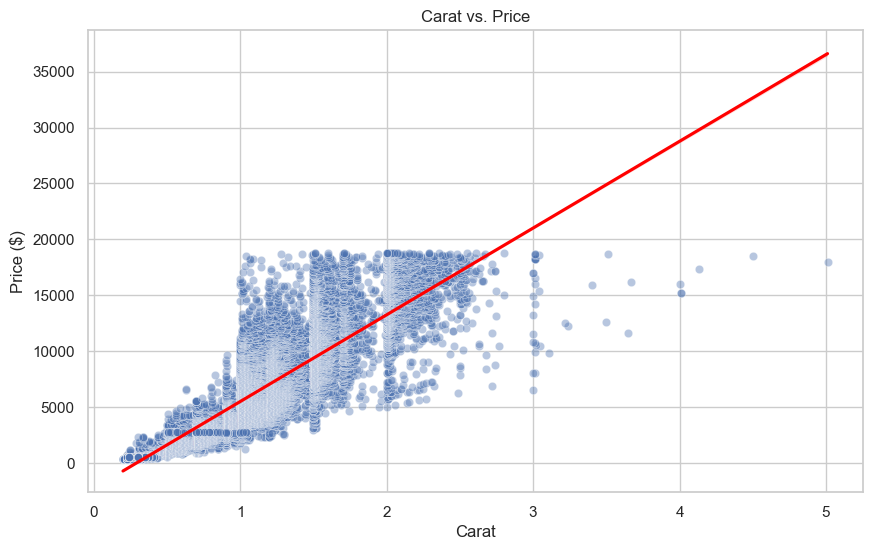

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', alpha=0.4)
sns.regplot(data=df, x='carat', y='price', scatter=False, color='red')
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.show()

We can see a strong positive correlation between carat and price. The red regression line shows this trend clearly, but we also see a lot of variance, suggesting other factors like cut and clarity also play a role.

What is the distribution of cut quality among the diamonds?

Chart Type: Bar Chart

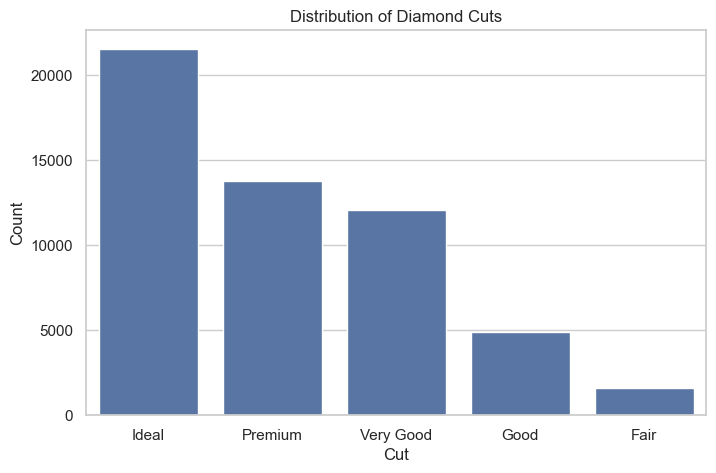

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cut', order=df['cut'].value_counts().index)
plt.title('Distribution of Diamond Cuts')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

Most diamonds in the dataset have an "Ideal" cut, followed by "Premium" and "Very Good." This distribution tells us that better cuts are more common in the dataset.

Goal: How does clarity affect the average price of diamonds?

Chart Type: Box Plot

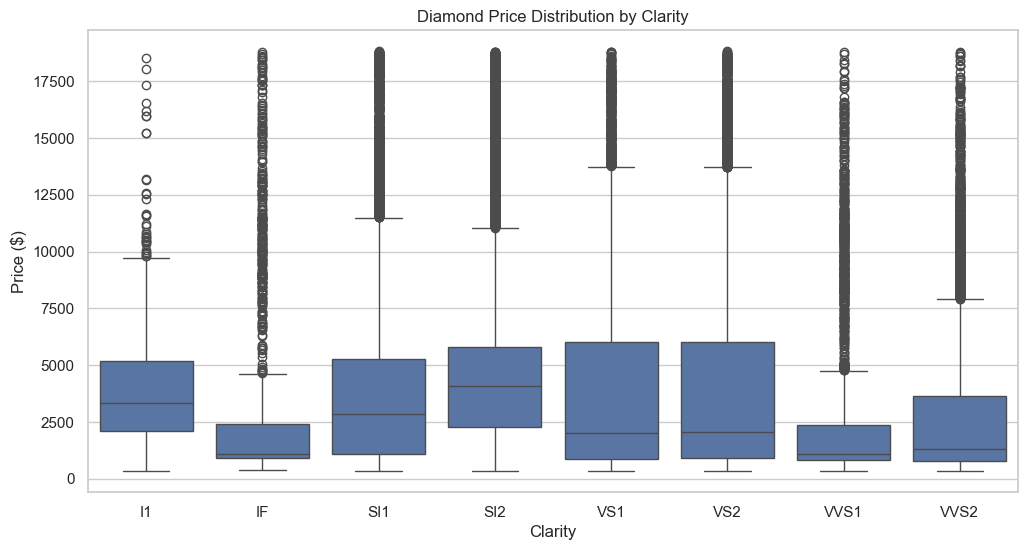

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='clarity', y='price', order=sorted(df['clarity'].unique()))
plt.title('Diamond Price Distribution by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price ($)')
plt.show()

Diamonds with better clarity (like IF or VVS1) tend to have a higher median price, but the spread is wide.

In this notebook, I explored how different features of diamonds affect their prices. After cleaning and enhancing the data (renaming x to length_mm and calculating volume), I visualized relationships between carat and price, the distribution of cuts, and the effect of clarity on price.

More analysis could be performed, especially in relation to price. Since diamonds are a commodity, the factors affecting price would likely be of the most interest to a prospective audience. For example, we could investiagte the correlation between volume and price. It is postulated that a higher volume would lead to a higher price, but we could affirm this with analysis.